# Myers-Brigs Type Indicator - MBTI
MBTI identifica cuatro dicotomías separadas:
Extraversión vs Introversión, Sensación vs Intuición, Pensamiento vs Sentimiento, y Juicio vs Percepción. Se supone que un individuo tiene preferencia por una de cada par de opuestos sobre la otra. 

<table align='center'>
<tr>
<th colspan=2> Extraversión - Introversión <br/> (actitudes u orientaciones de energía) </th>
</tr>

<tr>
<th> Extraversión (E) </th>
<th> Introversión (I) </th>
</tr>
<tr>
<td>
    Están orientados principalmente hacia el mundo exterior, tienden a enfocar su energía en las personas y los objetos.
</td>
<td>
    Están orientados principalmente hacia el mundo interior, tienden a enfocar su energía en conceptos, ideas y experiencias internas.  
</td>
</tr>

<tr>
<th colspan=2> Sensación - Intuición <br/> (funciones o procesos de percepción) </th>
</tr>
<tr>
<th> Sensación (S) </th>
<th> Intuición (N) </th>
</tr>
<tr>
<td>
    Están orientados principalmente hacia lo que se puede percibir por los cinco sentidos.
</td>
<td>
    Están enfocados principalmente en percibir patrones e interrelaciones.  
</td>
</tr>

<tr>
<th colspan=2> Sensación - Intuición <br/> (funciones o procesos de juicio) </th>
</tr>
<tr>
<th> Pensamiento (T) </th>
<th> Sentimiento (F) </th>
</tr>
<tr>
<td>
    Basando conclusiones en análisis lógicos con un enfoque en la objetividad y la distancia emocional.
</td>
<td>
    Basando conclusiones en valores personales o sociales con un enfoque en la comprensión y la armonía.  
</td>
</tr>

<tr>
<th colspan=2> Sensación - Intuición <br/> (actitudes u orientaciones hacia cómo se enfrenta el mundo exterior) </th>
</tr>
<tr>
<th> Juicio (J) </th>
<th> Percepción (P) </th>
</tr>
<tr>
<td>
    Prefiriendo la determinación y el cierre que resultan al lidiar con el mundo exterior utilizando uno de los procesos de Juicio.
</td>
<td>
    Prefiriendo la flexibilidad y espontaneidad que resulta al lidiar con el mundo exterior utilizando uno de los procesos de Percepción.  
</td>
</tr>
</table>

![](mbti.jpg)

## EDA → Análisis exploratorio de las palabras más repetidas por cada tipo de personalidad

In [56]:
# importaciones
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Leemos el dataset
mbti = pd.read_csv('../data/MBTI500.data.enriched.txt', sep='\t', header=0, encoding='utf-8')

# Exploramos para ver qué información tenemos y como está dispuesta
mbti.head()

,type,count,actually,also,always,come,could,de,det,en,...,u,use,want,way,well,work,would,yeah,year,Unnamed: 89
0,ENFJ,1534,0,3437,0,2409,0,0,0,3817,...,2421,2421,4354,3903,2921,2824,5231,0,0,NaN
1,ENFP,6167,0,13704,10250,10208,0,0,0,18756,...,0,0,19387,15935,11149,13580,16753,0,0,NaN
2,ENTJ,2955,0,6325,0,4292,0,0,0,8349,...,4990,4990,8172,6828,5514,6942,9739,0,0,NaN
3,ENTP,11725,0,24268,0,16825,17334,0,0,27712,...,21804,21804,30172,29124,22458,25334,37707,0,0,NaN
4,ESFJ,181,0,450,332,314,0,0,0,0,...,335,335,507,488,381,0,626,0,0,NaN


In [8]:
mbti.info

<bound method DataFrame.info of     type  count  actually   also  always   come  could   de   det     en  ...  \
0   ENFJ   1534         0   3437       0   2409      0    0     0   3817  ...   
1   ENFP   6167         0  13704   10250  10208      0    0     0  18756  ...   
2   ENTJ   2955         0   6325       0   4292      0    0     0   8349  ...   
3   ENTP  11725         0  24268       0  16825  17334    0     0  27712  ...   
4   ESFJ    181         0    450     332    314      0    0     0      0  ...   
5   ESFP    360         0    774       0    585      0    0     0      0  ...   
6   ESTJ    482         0    926       0      0      0  780  1753    810  ...   
7   ESTP   1986      2550   4787       0      0   2764    0     0      0  ...   
8   INFJ  14963         0  33727       0  24270      0    0     0      0  ...   
9   INFP  12134         0  26719   20017  18875      0    0     0      0  ...   
10  INTJ  22427         0  48949       0  33612  32442    0     0      0  ...

In [10]:
mbti.dtypes

type            object
count            int64
actually         int64
also             int64
always           int64
                ...   
work             int64
would            int64
yeah             int64
year             int64
Unnamed: 89    float64
Length: 90, dtype: object

In [11]:
# Comprobamos si hay valores faltantes
mbti.isna().sum()

type            0
count           0
actually        0
also            0
always          0
               ..
work            0
would           0
yeah            0
year            0
Unnamed: 89    16
Length: 90, dtype: int64

Existen valores faltantes en la última columna. La eliminamos para que no nos genere problemas.

In [15]:
mbti = mbti.drop('Unnamed: 89', axis=1)

In [17]:
mbti

,type,count,actually,also,always,come,could,de,det,en,...,type.1,u,use,want,way,well,work,would,yeah,year
0,ENFJ,1534,0,3437,0,2409,0,0,0,3817,...,4462,2421,2421,4354,3903,2921,2824,5231,0,0
1,ENFP,6167,0,13704,10250,10208,0,0,0,18756,...,12209,0,0,19387,15935,11149,13580,16753,0,0
2,ENTJ,2955,0,6325,0,4292,0,0,0,8349,...,7091,4990,4990,8172,6828,5514,6942,9739,0,0
3,ENTP,11725,0,24268,0,16825,17334,0,0,27712,...,25091,21804,21804,30172,29124,22458,25334,37707,0,0
4,ESFJ,181,0,450,332,314,0,0,0,0,...,891,335,335,507,488,381,0,626,0,0
5,ESFP,360,0,774,0,585,0,0,0,0,...,1458,648,648,810,857,692,552,1277,622,0
6,ESTJ,482,0,926,0,0,0,780,1753,810,...,1862,807,807,1047,979,710,828,1529,0,0
7,ESTP,1986,2550,4787,0,0,2764,0,0,0,...,3167,2705,3778,4199,3626,3759,3014,7024,0,2585
8,INFJ,14963,0,33727,0,24270,0,0,0,0,...,29741,23748,23748,44660,40800,27674,32591,44185,0,0
9,INFP,12134,0,26719,20017,18875,0,0,0,0,...,24522,18247,18247,34838,30809,22687,23215,35937,0,0


Vamos a eliminar las palabras que tengan menos de tres letras, ya que no nos van a servir

In [18]:
# eliminando columnas cuyo nombre es menor a 3

mbti = mbti.drop([columna for columna in mbti.columns if len(columna) < 3], axis=1)

In [20]:
mbti.shape

(16, 79)

→ Se eliminaron 10 columnas

→ Vamos a ver qué palabras hay en el dataset

In [24]:
mbti.columns

Index(['type', 'count', 'actually', 'also', 'always', 'come', 'could', 'det',
       'enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp', 'even',
       'feel', 'find', 'friend', 'function', 'german', 'germany', 'get',
       'give', 'good', 'help', 'ikke', 'infj', 'infp', 'interest', 'intj',
       'intp', 'isfj', 'isfp', 'istj', 'istp', 'jeg', 'know', 'life', 'like',
       'lol', 'look', 'lot', 'love', 'make', 'mean', 'much', 'need', 'one',
       'people', 'person', 'pretty', 'really', 'right', 'say', 'see', 'seem',
       'someone', 'something', 'still', 'take', 'talk', 'thank', 'thing',
       'think', 'though', 'til', 'time', 'try', 'type.1', 'use', 'want', 'way',
       'well', 'work', 'would', 'yeah', 'year'],
      dtype='object')

Como podemos observar dntro de las palabras están las abreviaciones de personalidades, las eliminamos ya que no nos proporcionarán información relevante.

In [35]:
abv = ['enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp', 'infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp',]

mbti = mbti.drop([column for column in  mbti.columns if column in abv], axis=1)

## Frecuencias de las palabras más repetidas

Según lo investigado sobre los tipos de personalidad los podemos dividir en 4 subgrupos:

![](subgrupos-mbti.jpg)

1. NF (manifestar valores universales y valorar a las personas)
    - ENFJ
    - ENFP
    - INFJ
    - INFP
2. NT (empujando a las personas con ideas hacia un futuro optimista)
    - ENTJ
    - ENTP
    - INTJ
    - INTP
3. SF (incluyendo y construyendo confianza)
    - ESFJ
    - ESFP
    - ISFJ
    - ISFP
4. ST (acción desde una perspectiva estratégica)
    - ESTJ
    - ESTP
    - ISTJ
    - ISTP

In [29]:
# Grupos
group_mapping = {
    'NF':'NF',
    'NT':'NT',    
    'SF':'SF',
    'ST':'ST'
}

# Creo una nueva columna con el grupo al que pertenece cada uno
mbti['grupo'] = mbti['type'].apply(lambda x: next((group for pattern, group in group_mapping.items() if pattern in x), None))

mbti

,type,count,actually,also,always,come,could,det,enfj,enfp,...,use,want,way,well,work,would,yeah,year,Grupo,grupo
0,ENFJ,1534,0,3437,0,2409,0,0,3817,0,...,2421,4354,3903,2921,2824,5231,0,0,NF,NF
1,ENFP,6167,0,13704,10250,10208,0,0,0,18756,...,0,19387,15935,11149,13580,16753,0,0,NF,NF
2,ENTJ,2955,0,6325,0,4292,0,0,0,0,...,4990,8172,6828,5514,6942,9739,0,0,NT,NT
3,ENTP,11725,0,24268,0,16825,17334,0,0,0,...,21804,30172,29124,22458,25334,37707,0,0,NT,NT
4,ESFJ,181,0,450,332,314,0,0,0,0,...,335,507,488,381,0,626,0,0,SF,SF
5,ESFP,360,0,774,0,585,0,0,0,0,...,648,810,857,692,552,1277,622,0,SF,SF
6,ESTJ,482,0,926,0,0,0,1753,0,0,...,807,1047,979,710,828,1529,0,0,ST,ST
7,ESTP,1986,2550,4787,0,0,2764,0,0,0,...,3778,4199,3626,3759,3014,7024,0,2585,ST,ST
8,INFJ,14963,0,33727,0,24270,0,0,0,0,...,23748,44660,40800,27674,32591,44185,0,0,NF,NF
9,INFP,12134,0,26719,20017,18875,0,0,0,0,...,18247,34838,30809,22687,23215,35937,0,0,NF,NF


In [90]:
# Groupby para ver las palabras más repetidas por cada grupo

group_mbti = mbti.groupby('grupo').sum()
group_mbti=group_mbti.drop('type', axis=1)

group_mbti

,count,actually,also,always,come,could,det,even,feel,find,...,try,type.1,use,want,way,well,work,would,yeah,year
grupo,,,,,,,,,,,,,,,,,,,,,
NF,34798,0,77587,30267,55762,0,0,69175,169277,74159,...,76767,70934,44416,103239,91447,64431,72210,102106,0,0
NT,62068,0,133342,0,90526,87429,0,120495,179165,120663,...,125575,114600,111890,161368,152586,112570,140199,201592,0,0
SF,2066,0,4626,2806,2243,0,0,3210,7861,3094,...,4028,7735,3660,5217,5095,4130,3186,7134,622,0
ST,7135,2550,15099,1750,6960,4754,1753,13312,16967,8077,...,12905,16023,13334,18067,15441,12970,15076,24465,0,2585


In [91]:
group_mbti.style.highlight_max(color='cadetblue', axis=1)

,count,actually,also,always,come,could,det,even,feel,find,friend,function,german,germany,get,give,good,help,ikke,interest,jeg,know,life,like,lol,look,lot,love,make,mean,much,need,one,people,person,pretty,really,right,say,see,seem,someone,something,still,take,talk,thank,thing,think,though,til,time,try,type.1,use,want,way,well,work,would,yeah,year
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NF,34798,0,77587,30267,55762,0,0,69175,169277,74159,79282,2516,0,0,179188,0,115634,24565,0,0,0,138167,62346,248956,0,18400,68677,81571,136935,11763,81334,65447,123414,187330,37622,0,123255,0,115492,82198,0,63949,76334,0,71833,34420,0,140645,205716,18721,0,124136,76767,70934,44416,103239,91447,64431,72210,102106,0,0
NT,62068,0,133342,0,90526,87429,0,120495,179165,120663,96445,0,0,0,307609,35733,199038,0,0,34945,0,210109,78849,387816,0,89782,102176,3979,236971,98546,129242,108961,215958,321887,0,0,173223,0,203522,134367,0,92195,132297,0,122280,16569,0,234231,341275,16346,0,200656,125575,114600,111890,161368,152586,112570,140199,201592,0,0
SF,2066,0,4626,2806,2243,0,0,3210,7861,3094,4450,3517,0,0,10328,0,6257,0,0,0,0,8195,0,16985,315,2067,4399,3364,7858,2135,4717,1080,7233,10713,0,564,7477,0,7891,4991,603,1094,4373,0,3921,1458,330,8458,13843,2488,0,6595,4028,7735,3660,5217,5095,4130,3186,7134,622,0
ST,7135,2550,15099,1750,6960,4754,1753,13312,16967,8077,8102,733,2876,2876,35972,4823,20394,0,988,0,728,23211,0,44409,0,8102,11420,0,24189,10344,14248,8391,22989,34016,0,0,19870,2992,23565,15942,0,6998,13650,2627,13250,7588,0,23203,35127,7067,717,21309,12905,16023,13334,18067,15441,12970,15076,24465,0,2585


La palabra más repetida es "like", como no nos resulta muy útil vamos a eliminarla

In [92]:
group_mbti = group_mbti.drop('like', axis=1)

In [93]:
group_mbti.style.highlight_max(color='cadetblue', axis=1)

,count,actually,also,always,come,could,det,even,feel,find,friend,function,german,germany,get,give,good,help,ikke,interest,jeg,know,life,lol,look,lot,love,make,mean,much,need,one,people,person,pretty,really,right,say,see,seem,someone,something,still,take,talk,thank,thing,think,though,til,time,try,type.1,use,want,way,well,work,would,yeah,year
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NF,34798,0,77587,30267,55762,0,0,69175,169277,74159,79282,2516,0,0,179188,0,115634,24565,0,0,0,138167,62346,0,18400,68677,81571,136935,11763,81334,65447,123414,187330,37622,0,123255,0,115492,82198,0,63949,76334,0,71833,34420,0,140645,205716,18721,0,124136,76767,70934,44416,103239,91447,64431,72210,102106,0,0
NT,62068,0,133342,0,90526,87429,0,120495,179165,120663,96445,0,0,0,307609,35733,199038,0,0,34945,0,210109,78849,0,89782,102176,3979,236971,98546,129242,108961,215958,321887,0,0,173223,0,203522,134367,0,92195,132297,0,122280,16569,0,234231,341275,16346,0,200656,125575,114600,111890,161368,152586,112570,140199,201592,0,0
SF,2066,0,4626,2806,2243,0,0,3210,7861,3094,4450,3517,0,0,10328,0,6257,0,0,0,0,8195,0,315,2067,4399,3364,7858,2135,4717,1080,7233,10713,0,564,7477,0,7891,4991,603,1094,4373,0,3921,1458,330,8458,13843,2488,0,6595,4028,7735,3660,5217,5095,4130,3186,7134,622,0
ST,7135,2550,15099,1750,6960,4754,1753,13312,16967,8077,8102,733,2876,2876,35972,4823,20394,0,988,0,728,23211,0,0,8102,11420,0,24189,10344,14248,8391,22989,34016,0,0,19870,2992,23565,15942,0,6998,13650,2627,13250,7588,0,23203,35127,7067,717,21309,12905,16023,13334,18067,15441,12970,15076,24465,0,2585


### Frecuencia de las 5 palabras más repetidas por cada tipo de personalidad

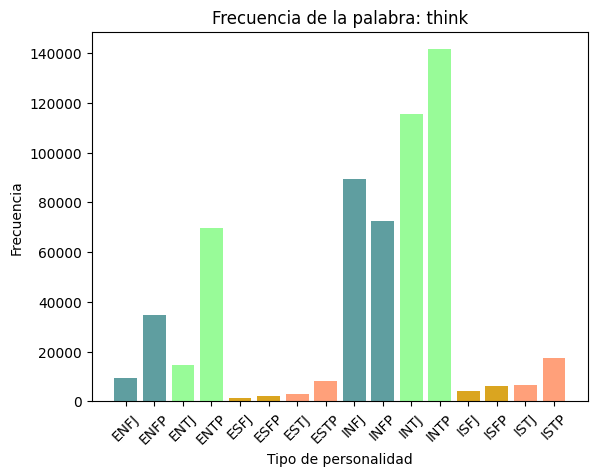

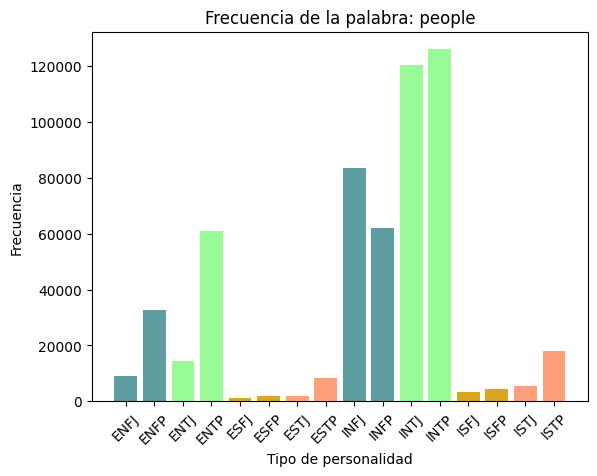

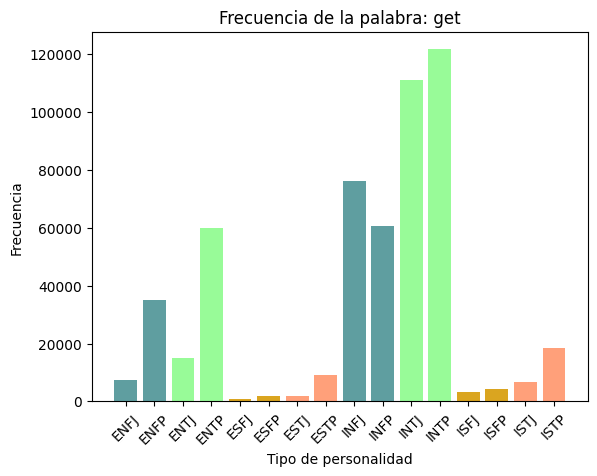

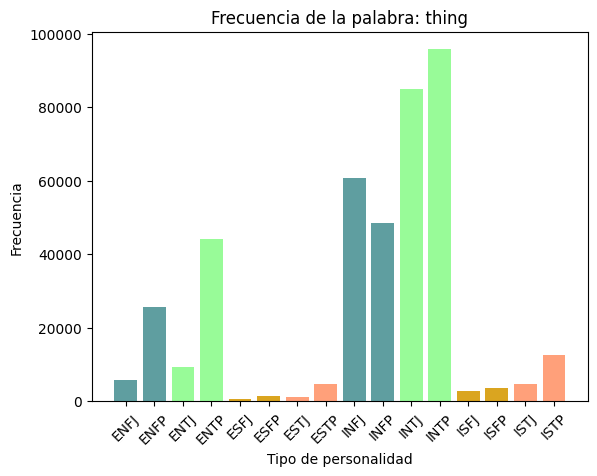

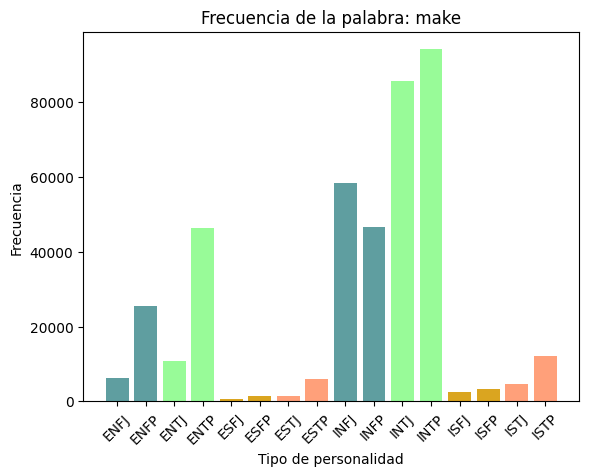

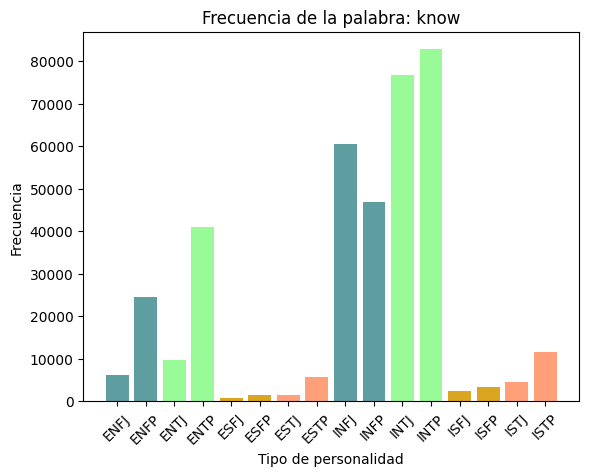

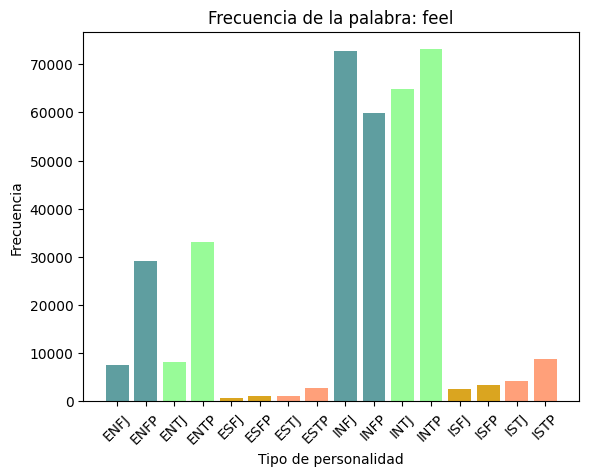

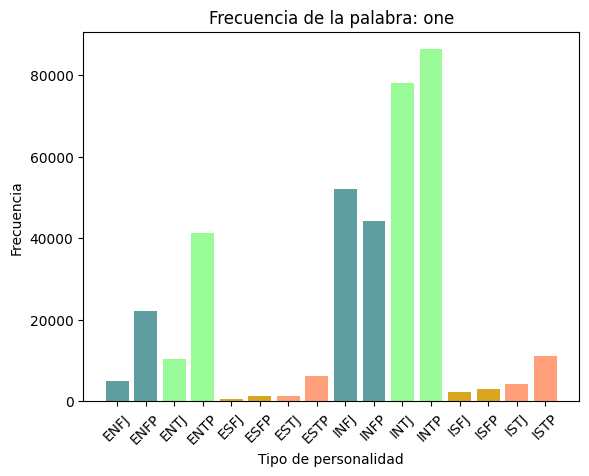

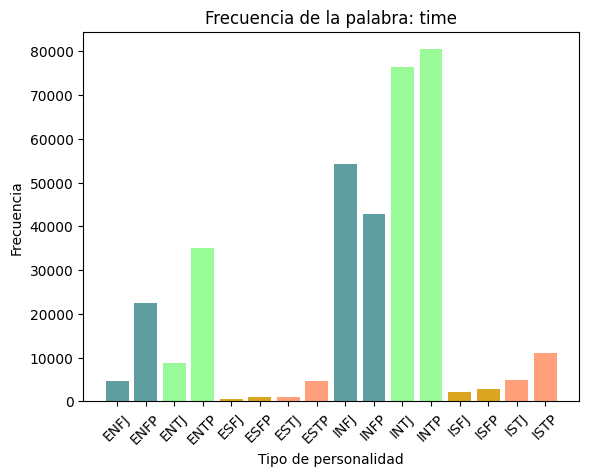

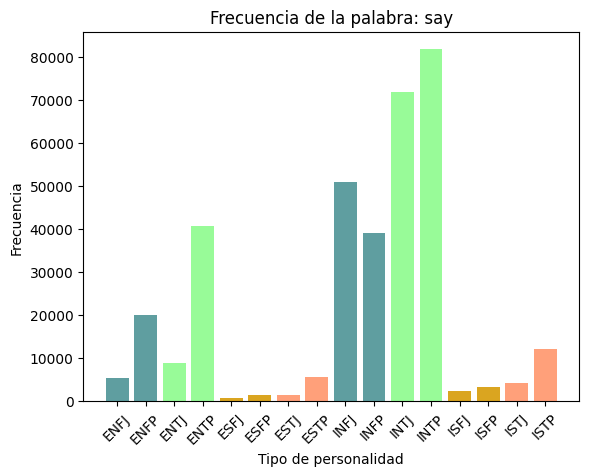

In [78]:
# Obtenemos la suma de las repeticiones de cada palabra
frecuencia = group_mbti.iloc[:,1:].sum()

# Seleccionamos las 5 más repetidas
top_10 = frecuencia.nlargest(10)

# Vamos a colorear las barras dependiendo el subgrupo en el que se encuentren
color_mapping = {
    'NT' : 'palegreen',
    'NF' : 'cadetblue',
    'SF' : 'goldenrod',
    'ST' : 'lightsalmon'
}

for word in top_10.index:
    frecuencias = mbti[word].tolist()

    # Graficamos la frecuecia de las 5 palabras para cada grupo
    plt.bar(mbti['type'], frecuencias,  color=[color_mapping[group] for group in mbti['grupo']])
    plt.xlabel('Tipo de personalidad')
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de la palabra: {word}')
    plt.xticks(rotation=45)

    plt.show()


#### Las 5 palabras más repetidas por cada subgrupo

In [101]:
mbti = mbti.drop('get', axis=1)
mbti = mbti.drop('like', axis=1)

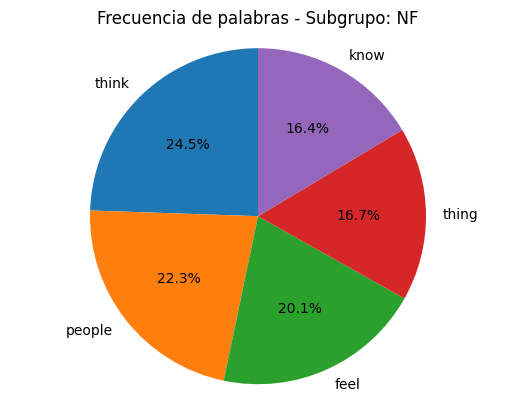

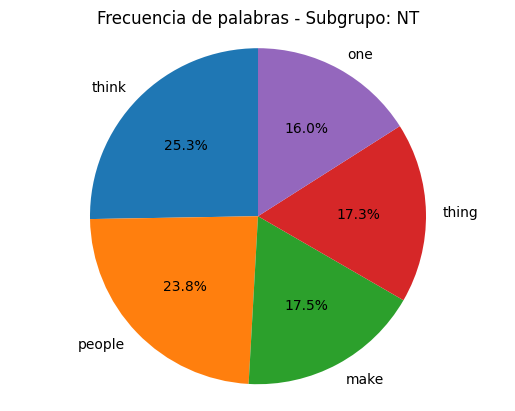

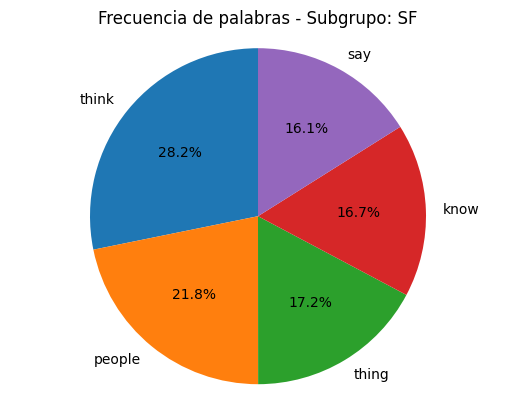

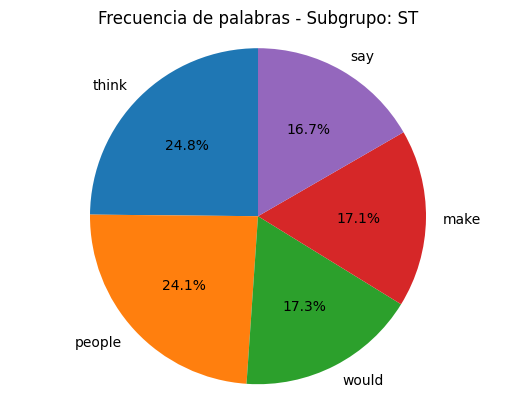

In [105]:
subgrupos = mbti['grupo'].unique()

for subgrupo in subgrupos:
    df_subgrupo = mbti[mbti['grupo'] == subgrupo]

    top_palabras =  df_subgrupo.iloc[:,1:-1].sum().sort_values(ascending=False).head(5).index

    frecuencias = df_subgrupo[top_palabras].sum()
    
    plt.pie(frecuencias, labels=top_palabras, autopct='%1.1f%%', startangle=90)
    plt.title(f"Frecuencia de palabras - Subgrupo: {subgrupo}")
    plt.axis('equal')
    plt.show()  


Podemos observar que en los cuatro casos las dos primeras palabras más repetidas coinciden: think y people

En los grupos NF y NT podemos podemos ver que tambien coinciden con la palbra thing. En el grupo NF vemos además las palabras know y feel. 
Para recordar: 
> El subgrupo NF (que incluye intuición y sentimiento)
>
> Están enfocados principalmente en percibir patrones e interrelaciones; 
>
> Basando conclusiones en valores personales o sociales con un enfoque en la comprensión y la armonía.
>
> Valorando a las personas

Según estas descripciones es lógico que entre las palabras más repetidas encontremos "personas", "sentir", "saber"

En los siguientes dos subgrupos SF y ST aparece la palabra say, make, thing y know
Recordando lo que connota Sentir (S): 
>  Están orientados principalmente hacia lo que se puede percibir por los cinco sentidos.

Parece correcto que en estos subgrupos aparezcan palabras como "thing: cosa/objeto"
